In [95]:
import collections
import pandas as pd
import spacy
import textacy
from tqdm import tqdm
import plotly.express as px

from IPython.display import Image

In [2]:
df = pd.read_csv("random_train_question_features.csv",low_memory=False)

In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'text_title', 'paragraph_text', 'question_id',
       'question_text', 'question_token', 'question_pos', 'question_tag',
       'question_parse_tree', 'correct_answer_text', 'correct_answer_sentence',
       'correct_answer_sentence_token', 'correct_answer_char_index',
       'correct_answer_token_index', 'correct_masked_answer_text_token',
       'correct_masked_answer_sentence_token', 'plausible_answer_text',
       'plausible_answer_sentence', 'plausible_answer_sentences_token',
       'plausible_answer_char_index', 'plausible_answer_token_index',
       'plausible_masked_answer_text_token',
       'plausible_masked_answer_sentence_token', 'paragraph_tokens',
       'WHP_type', 'WHP_token', 'merged_answer_token_index', 'min_answer_len',
       'max_answer_len', 'index.1', 'counter_answer', 'counter_unique_ answer',
       'contains_ner', 'contains_ner_type'],
      dtype='object')

In [4]:
df["contains_ner_type"]

0        {'', 'DATE'}
1                {''}
2            {'DATE'}
3         {'GPE', ''}
4            {'DATE'}
             ...     
53822            {''}
53823      {'PERSON'}
53824            {''}
53825            {''}
53826            {''}
Name: contains_ner_type, Length: 53827, dtype: object

In [5]:
from apyori import apriori
import ast
df["contains_ner_type"] = [ast.literal_eval(liste) for liste in df["contains_ner_type"]]

In [68]:
transactions = []
for i, row in tqdm(df.iterrows()):
    transaction = []
    #transaction.append(str(row["contains_ner_type"]))
    #transaction.append(row["WHP_type"])
    transaction.append(row["WHP_token"])
    ner_set = row["contains_ner_type"]
    ner_set.discard('')
    for ner in ner_set:
        transaction.append(ner)
    if ner_set == set():
        transaction.append("NO_NER")
    transactions.append(transaction)

53827it [00:07, 7073.49it/s]


In [73]:
association_rules = list(apriori(transactions, min_support=0.01, min_confidence=0.01))

In [74]:
rule_dict = {"items_base":[],
             "items_add":[],
             "confidence":[],
             "lift":[],
             "support":[],
            }

for item in association_rules:
    for rule in item.ordered_statistics:
        print(set(rule.items_base), "-->", set(rule.items_add),
              "\nlift: {}".format(rule.lift),
              "\nconfidence: {}".format(rule.confidence),
              "\nsupport: {}".format(item.support))
        
        rule_dict["items_base"].append(str(set(rule.items_base)))
        rule_dict["items_add"].append(str(set(rule.items_add)))
        rule_dict["confidence"].append(rule.confidence)
        rule_dict["support"].append(item.support)
        rule_dict["lift"].append(rule.lift)
        
        print("=====================================")

set() --> {'CARDINAL'} 
lift: 1.0 
confidence: 0.07877087706912887 
support: 0.07877087706912887
set() --> {'DATE'} 
lift: 1.0 
confidence: 0.12105448938265183 
support: 0.12105448938265183
set() --> {'FAC'} 
lift: 1.0 
confidence: 0.016683077266056067 
support: 0.016683077266056067
set() --> {'GPE'} 
lift: 1.0 
confidence: 0.07914243781002099 
support: 0.07914243781002099
set() --> {'How'} 
lift: 1.0 
confidence: 0.021494788860608988 
support: 0.021494788860608988
set() --> {'In what year'} 
lift: 1.0 
confidence: 0.01618147026585171 
support: 0.01618147026585171
set() --> {'LOC'} 
lift: 1.0 
confidence: 0.01887528563731956 
support: 0.01887528563731956
set() --> {'MONEY'} 
lift: 1.0 
confidence: 0.010310810559756255 
support: 0.010310810559756255
set() --> {'NORP'} 
lift: 1.0 
confidence: 0.046779497278317574 
support: 0.046779497278317574
set() --> {'NO_NER'} 
lift: 1.0 
confidence: 0.38415665000836013 
support: 0.38415665000836013
set() --> {'None'} 
lift: 1.0 
confidence: 0.075408

In [71]:
rule_df = pd.DataFrame(rule_dict)

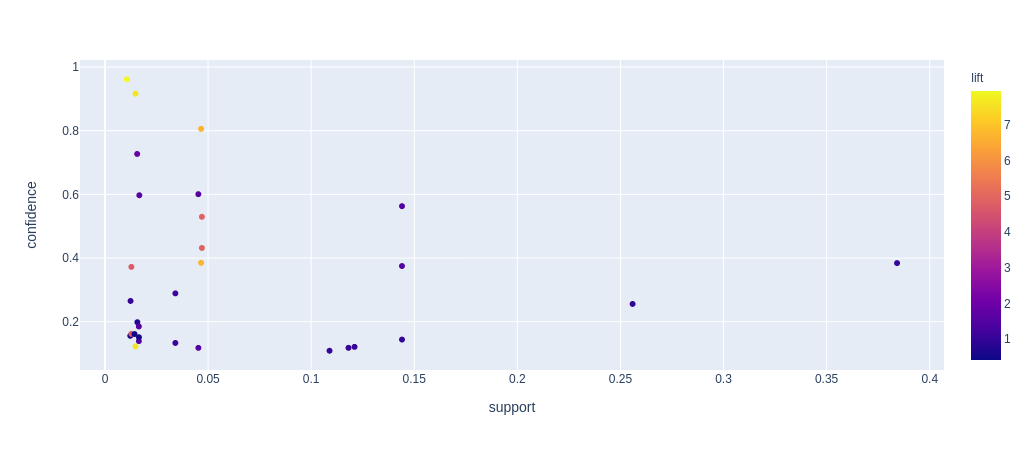

In [72]:
px.scatter(rule_df,
           x="support",
           y="confidence",
           color="lift",
          hover_data=rule_df.columns,
          )

In [15]:
df[["WHP_type", "WHP_token"]]

WHP_type               WHP_token
0       WHADVP                    When
1         WHNP                    What
2       WHADVP                    When
3         WHPP  In what city and state
4         WHPP         In which decade
...        ...                     ...
53822     WHNP                    What
53823     WHNP                    What
53824     WHNP                    What
53825     WHNP                    What
53826     WHNP                    What

[53827 rows x 2 columns]

What     13774
Who       4779
None      4059
When      3114
Where     1854
Name: WHP_token, dtype: int64

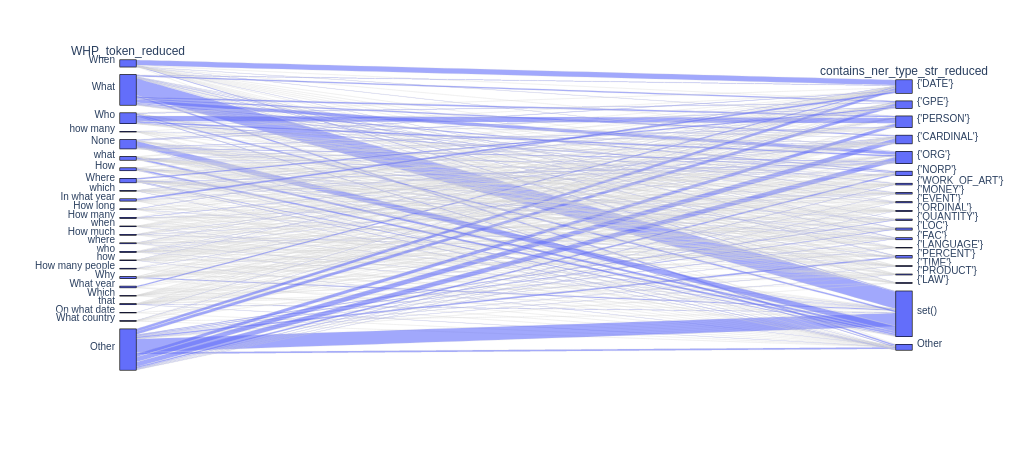

In [92]:
import plotly.express as px


fig = px.parallel_categories(df, dimensions=["WHP_token_reduced", "contains_ner_type_str_reduced"])
fig.show()

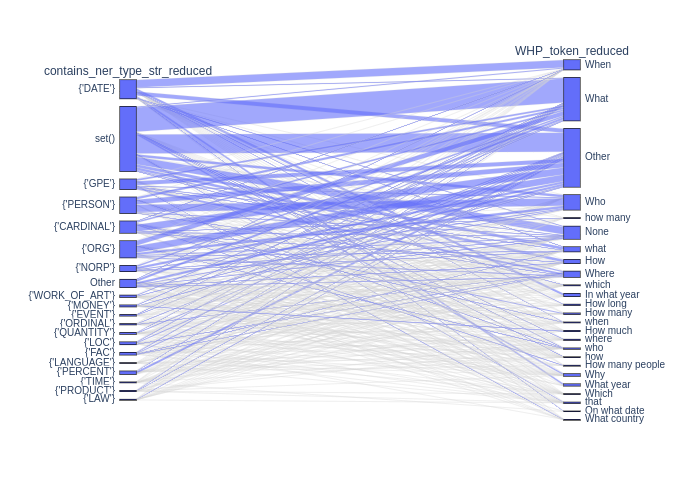

In [96]:
filename="images/answers/whp_ner.png"
fig.write_image(filename)
Image(filename)

In [58]:
len(set(list(df["contains_ner_type_str_reduced"])))

30

In [59]:
len(set(list(df["WHP_token_reduced"])))

15

In [56]:
px.data.tips()

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]